In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
country_wise = pd.read_csv('Dataset/country_wise_latest.csv')
covid_complete = pd.read_csv('Dataset/covid_19_clean_complete.csv')
day_wise = pd.read_csv('Dataset/day_wise.csv')
world_data = pd.read_csv('Dataset/worldometer_data.csv')
full_grouped = pd.read_csv('Dataset/full_grouped.csv')


In [9]:
country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [10]:
country_wise.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [47]:
def remove_col(df, old, new):
    df[new] = df[old]
    df.drop(old, axis=1, inplace=True)
    return df


In [48]:

remove_col(country_wise, 'Deaths / 100 Cases', 'Deathsp100')
remove_col(country_wise, 'Recovered / 100 Cases', 'Recoveredp100')
remove_col(country_wise, 'Deaths / 100 Recovered', 'Deathsp100Recovered')
remove_col(country_wise, 'Deaths / 100 Cases', 'Deathsp10athsp100')

KeyError: 'Deaths / 100 Cases'

In [50]:
(country_wise==np.inf).sum()

Country/Region         0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
New cases              0
New deaths             0
New recovered          0
Confirmed last week    0
1 week change          0
1 week % increase      0
WHO Region             0
Deathsp100             0
Recoveredp100          0
Deathsp100Recovered    5
Deathsp10athsp100      0
dtype: int64

In [55]:
country_wise[country_wise['Deathsp100Recovered'] == np.inf]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Deathsp100,Recoveredp100,Deathsp100Recovered,Deathsp10athsp100
32,Canada,116458,8944,0,107514,682,11,0,112925,3533,3.13,Americas,7.68,0.0,inf,7.68
117,Mozambique,1701,11,0,1690,32,0,0,1507,194,12.87,Africa,0.65,0.0,inf,0.65
147,Serbia,24141,543,0,23598,411,9,0,21253,2888,13.59,Europe,2.25,0.0,inf,2.25
161,Sweden,79395,5700,0,73695,398,3,0,78048,1347,1.73,Europe,7.18,0.0,inf,7.18
163,Syria,674,40,0,634,24,2,0,522,152,29.12,Eastern Mediterranean,5.93,0.0,inf,5.93


In [59]:
country_wise['Deathsp100Recovered'].loc[country_wise['Deathsp100Recovered'] == np.inf] = 0# [country_wise['Deathsp100Recovered'] == np.inf ] = 0

c:\users\codin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
(country_wise==np.inf).sum()

Country/Region         0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
New cases              0
New deaths             0
New recovered          0
Confirmed last week    0
1 week change          0
1 week % increase      0
WHO Region             0
Deathsp100             0
Recoveredp100          0
Deathsp100Recovered    0
Deathsp10athsp100      0
dtype: int64

In [69]:
country_wise['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [148]:
group_by_who_region = country_wise.groupby('WHO Region')

In [149]:
region_sum = group_by_who_region.agg('sum')

In [150]:
regions = country_wise['WHO Region'].unique().tolist()
countries_per_region = {}

for region in regions:
    countries_per_region[region] = (country_wise['WHO Region'] == region).sum()

In [151]:
countries_per_region

{'Eastern Mediterranean': 22,
 'Europe': 56,
 'Africa': 48,
 'Americas': 35,
 'Western Pacific': 16,
 'South-East Asia': 10}

In [152]:
region_sum.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,Deathsp100,Recoveredp100,Deathsp100Recovered,Deathsp10athsp100
WHO Region,,,,,,,,,,,,,,
Africa,723207,12223,440645,270339,12176,353,14563,608120,115087,868.15,110.71,2736.71,216.27,110.71
Americas,8839286,342732,4468616,4027938,129531,3555,94776,7815198,1024088,571.59,106.84,2180.20,194.70,106.84
Eastern Mediterranean,1490744,38339,1201400,251005,12410,445,14843,1398847,91897,230.61,78.39,1465.05,137.51,78.39
Europe,3299523,211144,1993723,1094656,22294,304,11732,3146816,152707,435.10,235.11,3843.56,6784.97,235.11
South-East Asia,1835297,41349,1156933,637015,48993,734,37582,1478283,357014,85.13,12.96,667.04,19.56,12.96


In [153]:
region_sum['1 week % increase'] = region_sum['1 week change']/region_sum['Confirmed last week']
#region_sum.apply(lambda x: x['Deathsp100']=x['Deathsp100']/countries_per_region[x['WHO Region']])# = region_sum['Deathsp100']/

In [154]:
region_sum['Deathsp100'] = region_sum.apply(lambda x: x['Deathsp100']/countries_per_region[x.name], axis=1)

In [155]:
region_sum

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,Deathsp100,Recoveredp100,Deathsp100Recovered,Deathsp10athsp100
WHO Region,,,,,,,,,,,,,,
Africa,723207,12223,440645,270339,12176,353,14563,608120,115087,0.189250,2.306458,2736.71,216.27,110.71
Americas,8839286,342732,4468616,4027938,129531,3555,94776,7815198,1024088,0.131038,3.052571,2180.20,194.70,106.84
Eastern Mediterranean,1490744,38339,1201400,251005,12410,445,14843,1398847,91897,0.065695,3.563182,1465.05,137.51,78.39
Europe,3299523,211144,1993723,1094656,22294,304,11732,3146816,152707,0.048527,4.198393,3843.56,6784.97,235.11
South-East Asia,1835297,41349,1156933,637015,48993,734,37582,1478283,357014,0.241506,1.296000,667.04,19.56,12.96
Western Pacific,292428,8249,206770,77409,3289,24,1127,266359,26069,0.097872,1.290000,1228.88,28.60,20.64


In [157]:
region_sum['Recoveredp100'] = region_sum.apply(lambda x: x['Recoveredp100']/countries_per_region[x.name], axis=1)
region_sum

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,Deathsp100,Recoveredp100,Deathsp100Recovered,Deathsp10athsp100
WHO Region,,,,,,,,,,,,,,
Africa,723207,12223,440645,270339,12176,353,14563,608120,115087,0.189250,2.306458,1.187808,216.27,110.71
Americas,8839286,342732,4468616,4027938,129531,3555,94776,7815198,1024088,0.131038,3.052571,1.779755,194.70,106.84
Eastern Mediterranean,1490744,38339,1201400,251005,12410,445,14843,1398847,91897,0.065695,3.563182,3.026963,137.51,78.39
Europe,3299523,211144,1993723,1094656,22294,304,11732,3146816,152707,0.048527,4.198393,1.225625,6784.97,235.11
South-East Asia,1835297,41349,1156933,637015,48993,734,37582,1478283,357014,0.241506,1.296000,6.670400,19.56,12.96
Western Pacific,292428,8249,206770,77409,3289,24,1127,266359,26069,0.097872,1.290000,4.800312,28.60,20.64


In [158]:
region_sum['Deathsp100Recovered'] = region_sum.apply(lambda x: x['Deathsp100Recovered']/countries_per_region[x.name], axis=1)
region_sum

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,Deathsp100,Recoveredp100,Deathsp100Recovered,Deathsp10athsp100
WHO Region,,,,,,,,,,,,,,
Africa,723207,12223,440645,270339,12176,353,14563,608120,115087,0.189250,2.306458,1.187808,4.505625,110.71
Americas,8839286,342732,4468616,4027938,129531,3555,94776,7815198,1024088,0.131038,3.052571,1.779755,5.562857,106.84
Eastern Mediterranean,1490744,38339,1201400,251005,12410,445,14843,1398847,91897,0.065695,3.563182,3.026963,6.250455,78.39
Europe,3299523,211144,1993723,1094656,22294,304,11732,3146816,152707,0.048527,4.198393,1.225625,121.160179,235.11
South-East Asia,1835297,41349,1156933,637015,48993,734,37582,1478283,357014,0.241506,1.296000,6.670400,1.956000,12.96
Western Pacific,292428,8249,206770,77409,3289,24,1127,266359,26069,0.097872,1.290000,4.800312,1.787500,20.64


In [159]:
region_sum['Deathsp10athsp100'] = region_sum.apply(lambda x: x['Deathsp10athsp100']/countries_per_region[x.name], axis=1)
region_sum

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,Deathsp100,Recoveredp100,Deathsp100Recovered,Deathsp10athsp100
WHO Region,,,,,,,,,,,,,,
Africa,723207,12223,440645,270339,12176,353,14563,608120,115087,0.189250,2.306458,1.187808,4.505625,2.306458
Americas,8839286,342732,4468616,4027938,129531,3555,94776,7815198,1024088,0.131038,3.052571,1.779755,5.562857,3.052571
Eastern Mediterranean,1490744,38339,1201400,251005,12410,445,14843,1398847,91897,0.065695,3.563182,3.026963,6.250455,3.563182
Europe,3299523,211144,1993723,1094656,22294,304,11732,3146816,152707,0.048527,4.198393,1.225625,121.160179,4.198393
South-East Asia,1835297,41349,1156933,637015,48993,734,37582,1478283,357014,0.241506,1.296000,6.670400,1.956000,1.296000
Western Pacific,292428,8249,206770,77409,3289,24,1127,266359,26069,0.097872,1.290000,4.800312,1.787500,1.290000


In [160]:
import seaborn as sns


In [161]:
covid_data_by_region = region_sum.copy()


In [162]:
covid_data_by_region.index

Index(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'],
      dtype='object', name='WHO Region')

In [163]:
covid_data_by_region['Region'] = covid_data_by_region.index.tolist()

In [164]:
covid_data_by_region

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,Deathsp100,Recoveredp100,Deathsp100Recovered,Deathsp10athsp100,Region
WHO Region,,,,,,,,,,,,,,,
Africa,723207,12223,440645,270339,12176,353,14563,608120,115087,0.189250,2.306458,1.187808,4.505625,2.306458,Africa
Americas,8839286,342732,4468616,4027938,129531,3555,94776,7815198,1024088,0.131038,3.052571,1.779755,5.562857,3.052571,Americas
Eastern Mediterranean,1490744,38339,1201400,251005,12410,445,14843,1398847,91897,0.065695,3.563182,3.026963,6.250455,3.563182,Eastern Mediterranean
Europe,3299523,211144,1993723,1094656,22294,304,11732,3146816,152707,0.048527,4.198393,1.225625,121.160179,4.198393,Europe
South-East Asia,1835297,41349,1156933,637015,48993,734,37582,1478283,357014,0.241506,1.296000,6.670400,1.956000,1.296000,South-East Asia
Western Pacific,292428,8249,206770,77409,3289,24,1127,266359,26069,0.097872,1.290000,4.800312,1.787500,1.290000,Western Pacific


<AxesSubplot:title={'center':'Confirmed Cases by WHO Region'}, xlabel='Region', ylabel='Confirmed'>

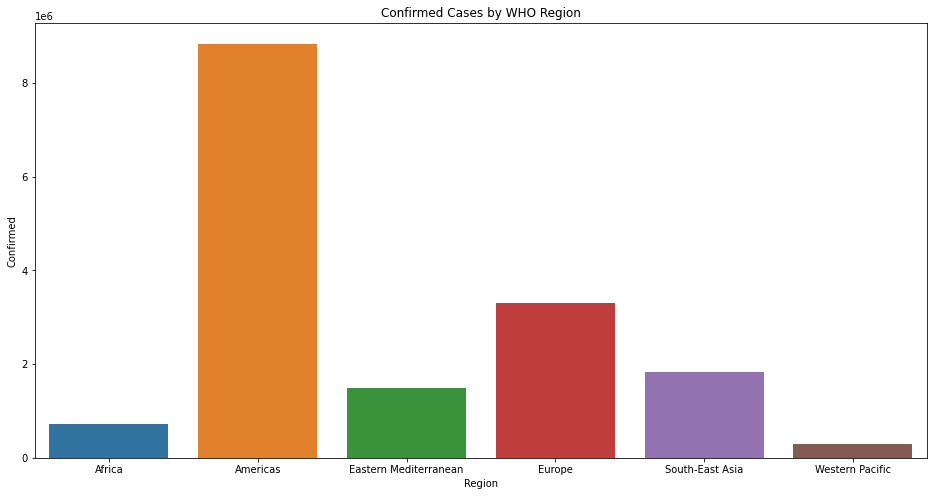

In [195]:
plt.figure(figsize=(16, 8))
plt.title('Confirmed Cases by WHO Region')
sns.barplot(x='Region', y='Confirmed', data=covid_data_by_region,)

<AxesSubplot:title={'center':'Week % increase by WHO Region'}, xlabel='Region', ylabel='1 week % increase'>

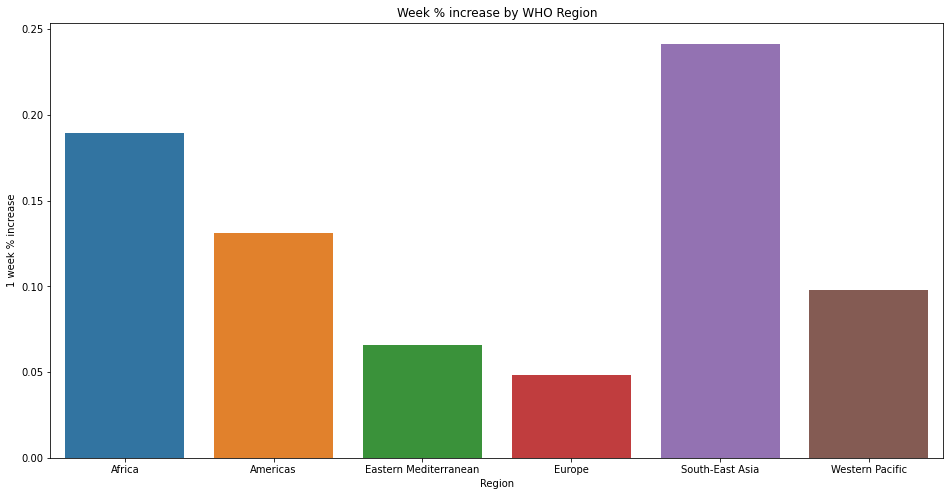

In [165]:
plt.figure(figsize=(16, 8))
plt.title('Week % increase by WHO Region')
sns.barplot(x='Region', y='1 week % increase', data=covid_data_by_region)

<AxesSubplot:title={'center':'New deaths per WHO Region'}, xlabel='Region', ylabel='New deaths'>

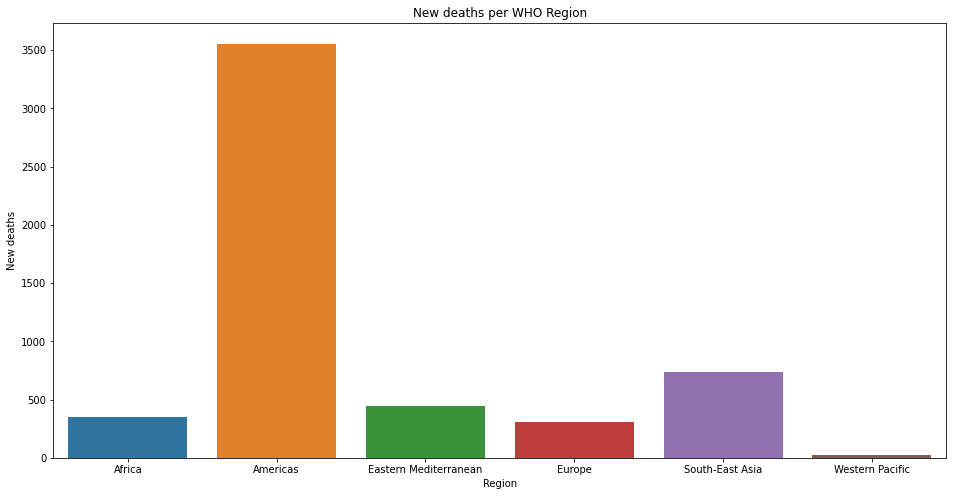

In [167]:
plt.figure(figsize=(16, 8))
plt.title('New deaths per WHO Region')
sns.barplot(x='Region', y='New deaths', data=covid_data_by_region)

<AxesSubplot:title={'center':'Recovered by WHO Region'}, xlabel='Region', ylabel='Recovered'>

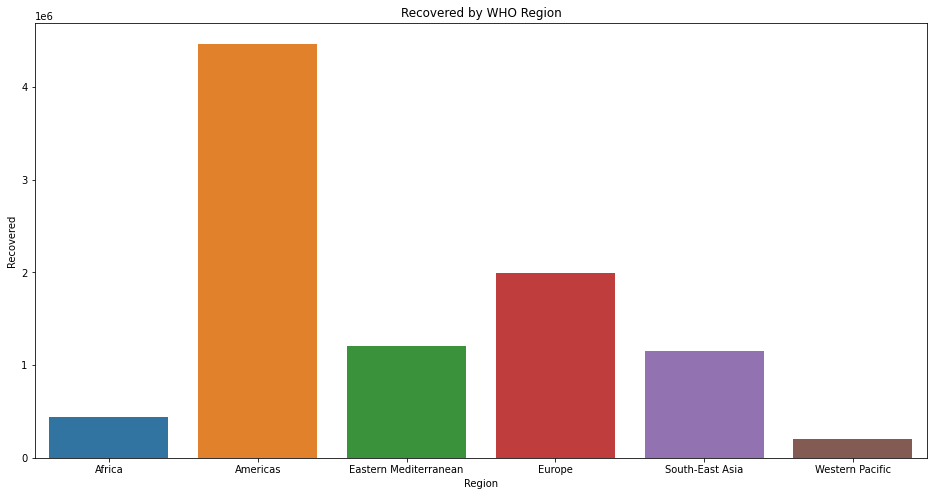

In [168]:
plt.figure(figsize=(16, 8))
plt.title('Recovered by WHO Region')
sns.barplot(x='Region', y='Recovered', data=covid_data_by_region)

<AxesSubplot:title={'center':'Deaths per 100 people by WHO Region'}, xlabel='Region', ylabel='Deathsp100'>

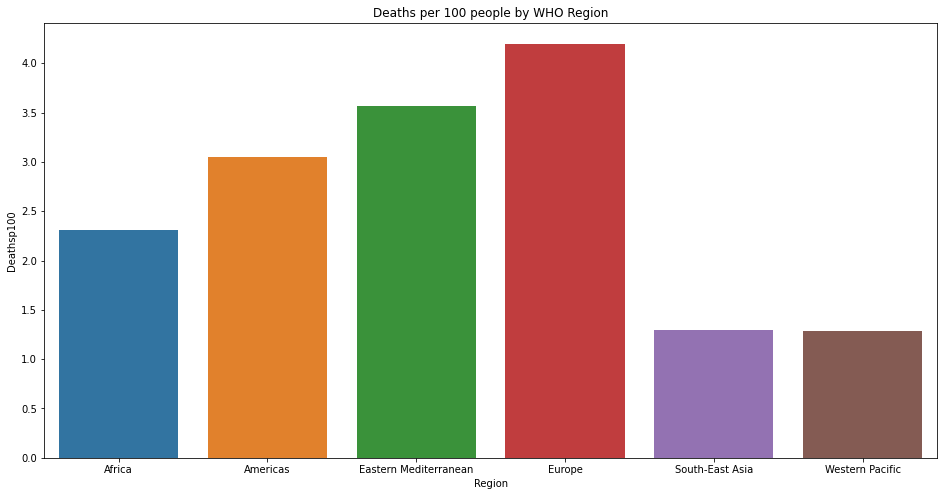

In [169]:
plt.figure(figsize=(16, 8))
plt.title('Deaths per 100 people by WHO Region')
sns.barplot(x='Region', y='Deathsp100', data=covid_data_by_region)

<AxesSubplot:title={'center':'Recovered per 100 people by WHO Region'}, xlabel='Region', ylabel='Recoveredp100'>

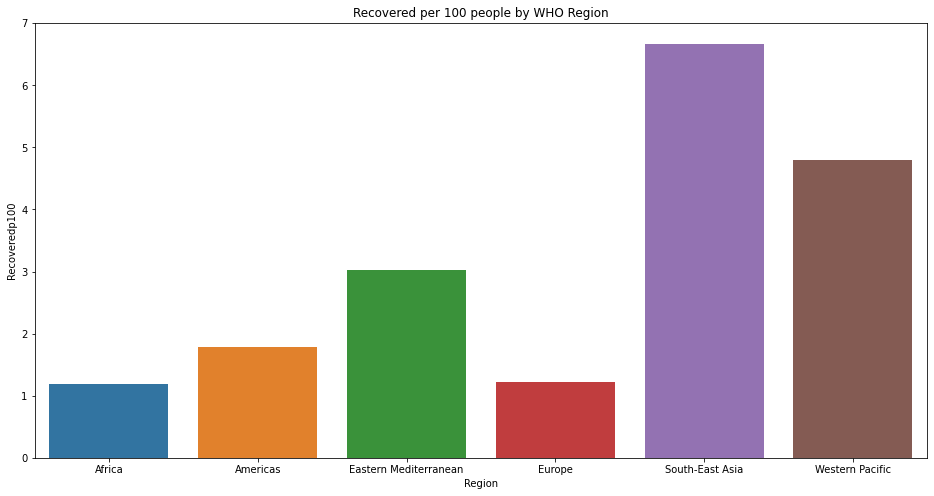

In [170]:
plt.figure(figsize=(16, 8))
plt.title('Recovered per 100 people by WHO Region')
sns.barplot(x='Region', y='Recoveredp100', data=covid_data_by_region)

In [172]:
covid_data_by_region['ratio_deaths_confirmed'] = covid_data_by_region['Deaths']/covid_data_by_region['Confirmed']


<AxesSubplot:title={'center':'Ratio of deaths to confirmed'}, xlabel='Region', ylabel='ratio_deaths_confirmed'>

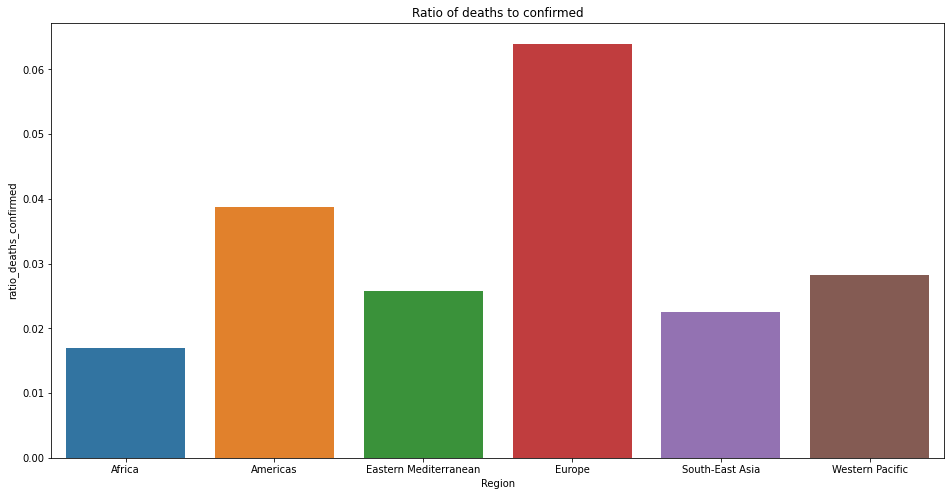

In [173]:
plt.figure(figsize=(16, 8))
plt.title('Ratio of deaths to confirmed')
sns.barplot(x='Region', y='ratio_deaths_confirmed', data=covid_data_by_region)

In [174]:
covid_data_by_region['ratio_active_confirmed'] = covid_data_by_region['Active']/covid_data_by_region['Confirmed']
covid_data_by_region['ratio_recovered_confirmed'] = covid_data_by_region['Recovered']/covid_data_by_region['Confirmed']



<AxesSubplot:title={'center':'Ratio of recovered to confirmed'}, xlabel='Region', ylabel='ratio_recovered_confirmed'>

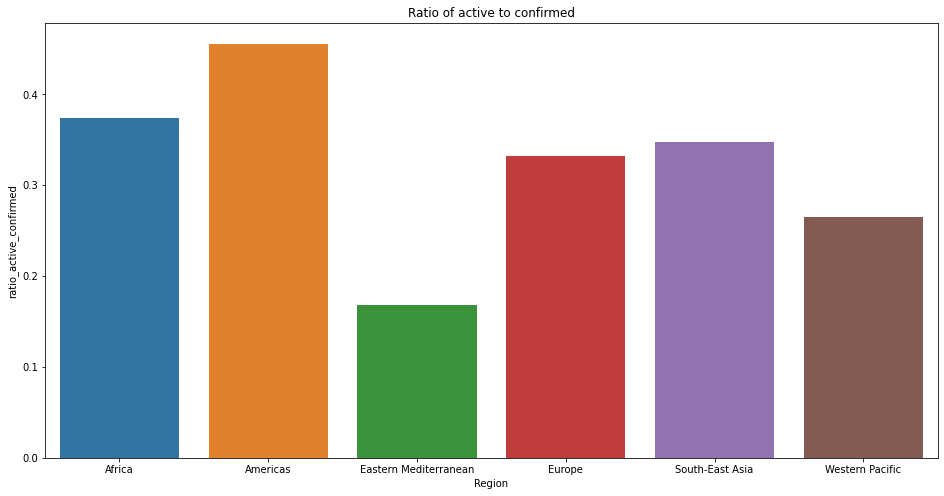

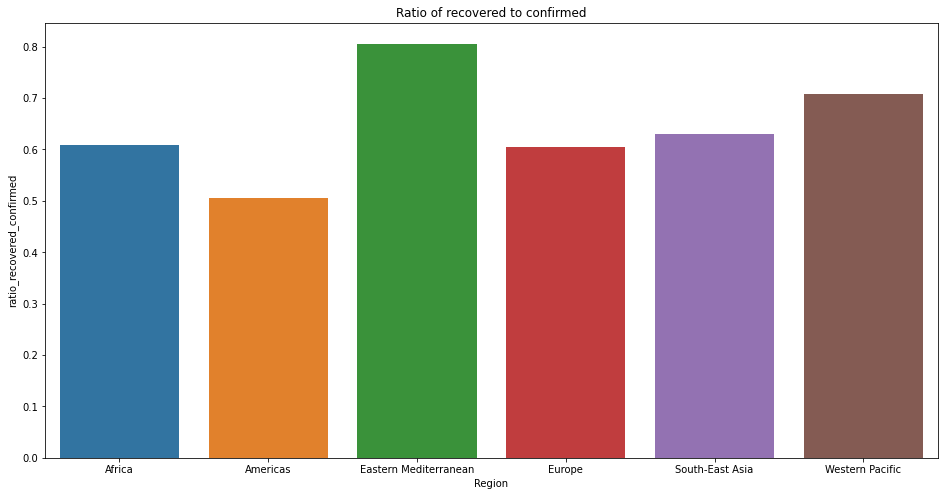

In [175]:
plt.figure(figsize=(16, 8))
plt.title('Ratio of active to confirmed')
sns.barplot(x='Region', y='ratio_active_confirmed', data=covid_data_by_region)

plt.figure(figsize=(16, 8))
plt.title('Ratio of recovered to confirmed')
sns.barplot(x='Region', y='ratio_recovered_confirmed', data=covid_data_by_region)

In [182]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [198]:
day_wise['Date'] = pd.to_datetime(day_wise['Date'],)

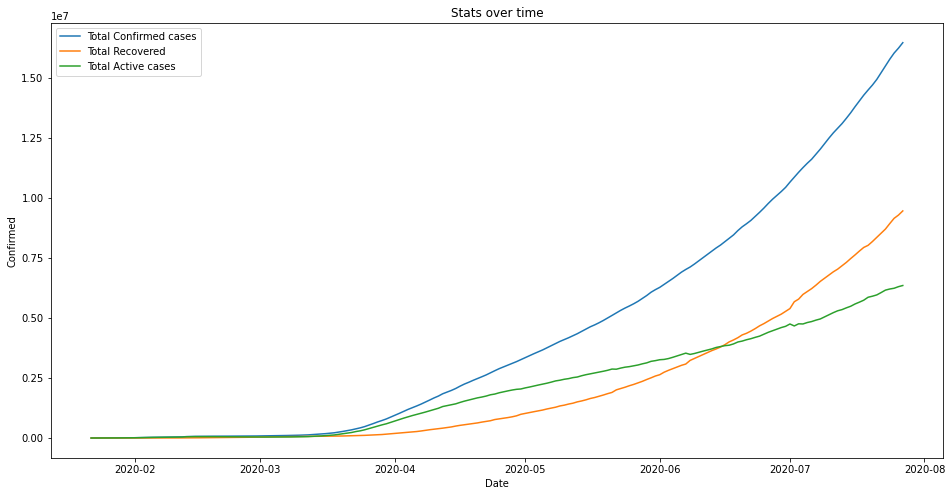

In [210]:
plt.figure(figsize=(16, 8))
plt.title('Stats over time')
sns.lineplot(x='Date', y='Confirmed', data=day_wise, label='Total Confirmed cases')
sns.lineplot(x='Date', y='Recovered', data=day_wise, label='Total Recovered')
sns.lineplot(x='Date', y='Active', data=day_wise, label='Total Active cases')


plt.legend()

<AxesSubplot:title={'center':'New cases against new deaths'}, xlabel='New cases', ylabel='New deaths'>

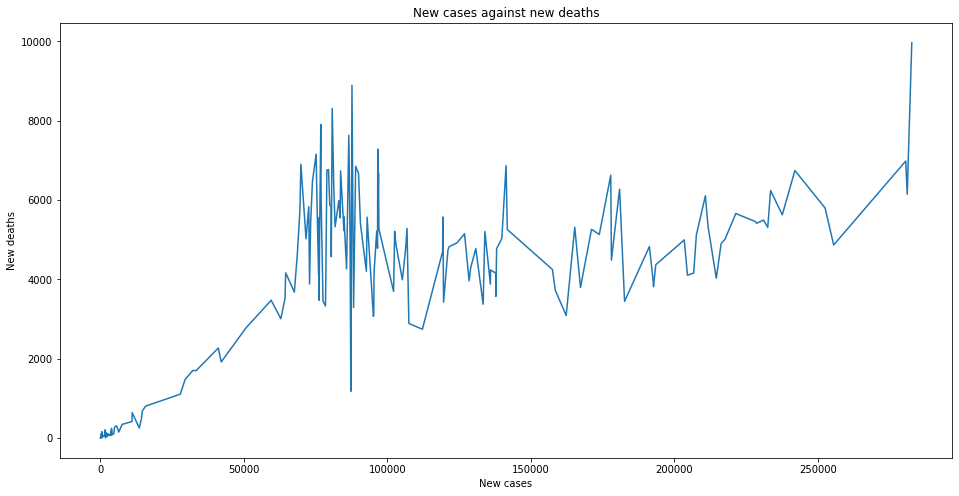

In [203]:
plt.figure(figsize=(16, 8))
plt.title('New cases against new deaths')
sns.lineplot(x='New cases', y='New deaths', data=day_wise)


<AxesSubplot:title={'center':'New deaths over time'}, xlabel='Date', ylabel='New deaths'>

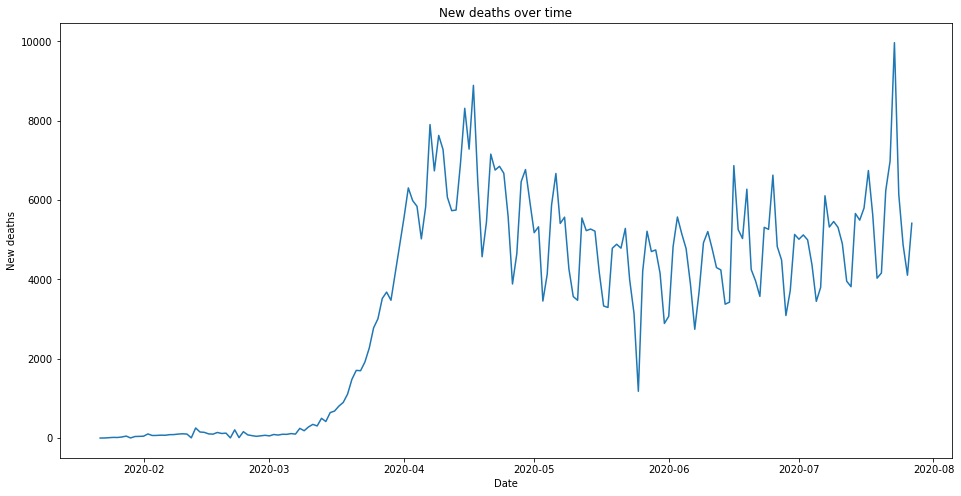

In [204]:
plt.figure(figsize=(16, 8))
plt.title('New deaths over time')
sns.lineplot(x='Date', y='New deaths', data=day_wise)


<AxesSubplot:title={'center':'Deaths / 100 Cases over time'}, xlabel='Date', ylabel='Deaths / 100 Cases'>

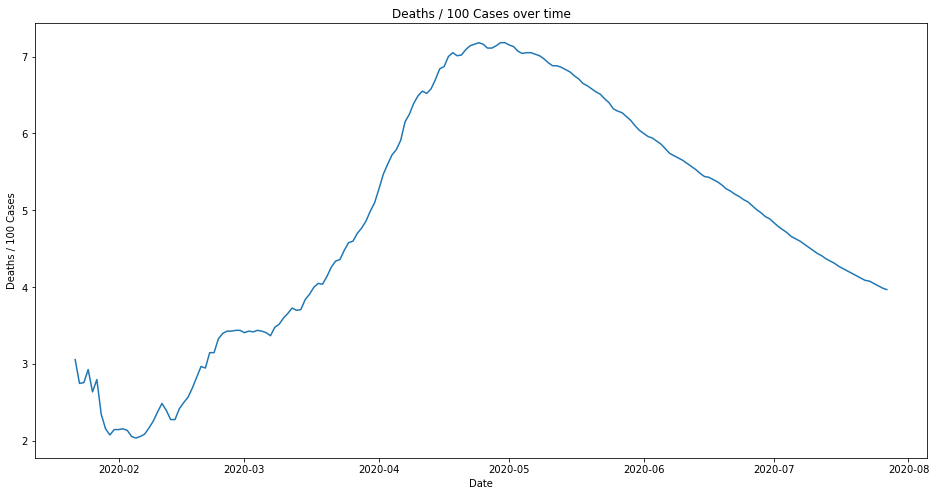

In [211]:
plt.figure(figsize=(16, 8))
plt.title('Deaths / 100 Cases over time')
sns.lineplot(x='Date', y='Deaths / 100 Cases', data=day_wise)


<AxesSubplot:title={'center':'Deaths / 100 Recovered over time'}, xlabel='Date', ylabel='Deaths / 100 Recovered'>

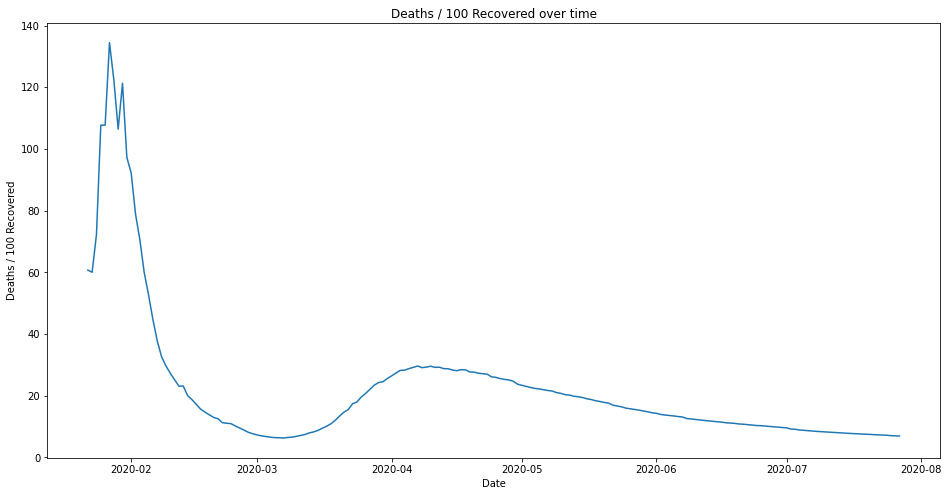

In [212]:
plt.figure(figsize=(16, 8))
plt.title('Deaths / 100 Recovered over time')
sns.lineplot(x='Date', y='Deaths / 100 Recovered', data=day_wise)


<AxesSubplot:title={'center':'confirmed vs number of countries over time'}, xlabel='Confirmed', ylabel='No. of countries'>

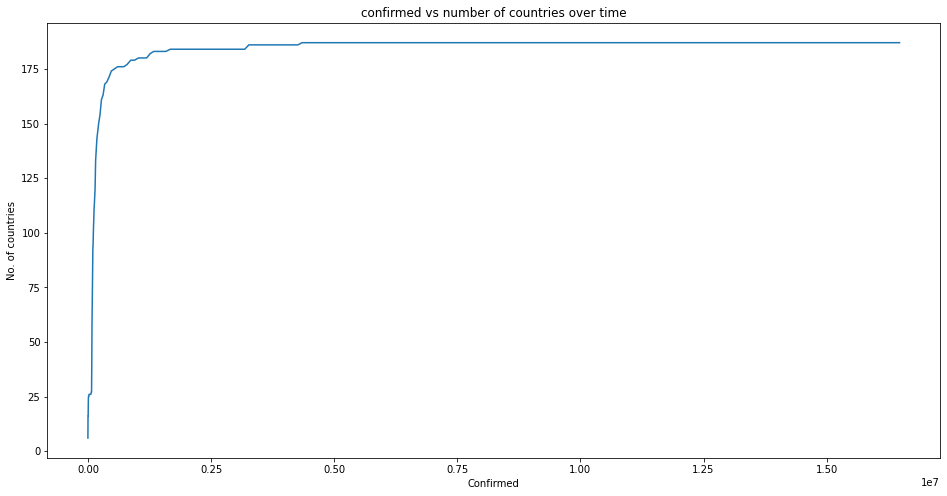

In [213]:
plt.figure(figsize=(16, 8))
plt.title('confirmed vs number of countries over time')
sns.lineplot(x='Confirmed', y='No. of countries', data=day_wise)
